In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams
from src.agents.ppo.ppo_agent import PPOAgent

In [3]:
easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [4]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [5]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

In [6]:
import torch
import numpy as np
import pickle

torch.manual_seed(101)
np.random.seed(101)

for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    train_parameters = {
        "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
        "action_dim": 3,
        "action_space": [0, 1, 2],
        "num_layers": 3,
        "hidden_dim": 64,
        "gamma": 0.99,
        "total_training_time_step": 1_000_000,
        "batch_size": 64,
        "learning_rate": 3e-5,
        "device": "cpu",
        "clip": 0.2,
        "epochs_per_iteration": 64,
        "timeout": 200,
    }

    agent = PPOAgent(env, train_parameters)
    result = agent.train(train_parameters["total_training_time_step"])

    filename = (
            f"./checkpoints/final_ppo_fixed/{env_type}"
        )
    agent.save(filename)

    with open(f"./checkpoints/final_ppo_fixed/{env_type}_training_results.pkl", "wb") as f:
        pickle.dump(result, f)

Training Progress: 100%|██████████| 15625/15625 [11:44<00:00, 22.18it/s]


In [9]:
all_training_results = []

for env_type in ["easy", "medium", "hard"]:
    with open(f"./checkpoints/final_ppo_fixed/{env_type}_training_results.pkl", "rb") as f:
        all_training_results.append(pickle.load(f))
        

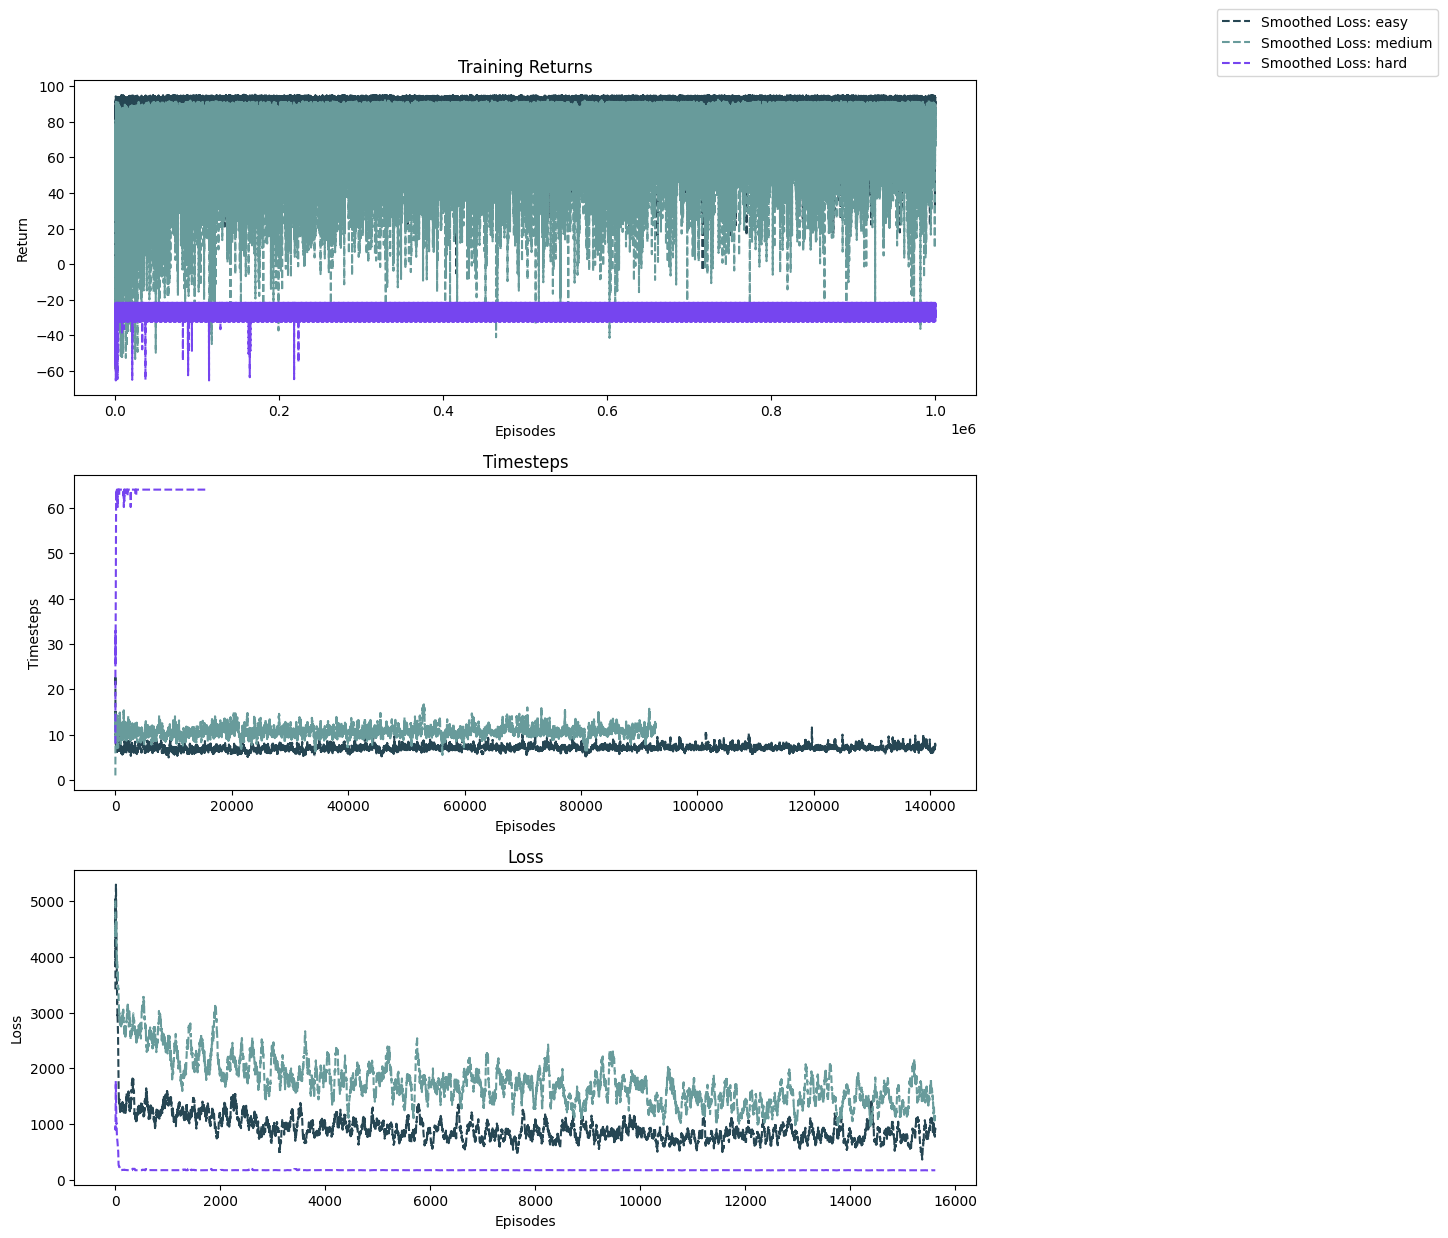

In [10]:
agent.plot_multiple_training_result(all_training_results, ["easy", "medium", "hard"])